# Linear Regression

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
plt.style.use('bmh')
plt.rcParams['lines.markeredgecolor'] = 'w'
plt.rcParams['lines.markeredgewidth'] = 0.5
plt.rcParams['figure.figsize'] = [8, 6]
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [2]:
df = pd.read_csv("Data_Cortex_Nuclear.csv")

# get rid of _N at the end of each column title
coltitles = list(df.columns)
for i in range(len(coltitles)):
    if coltitles[i].endswith('_N'):
        coltitles[i] = coltitles[i][:-2]
df.columns = coltitles

df

,MouseID,DYRK1A,ITSN1,BDNF,NR1,NR2A,pAKT,pBRAF,pCAMKII,pCREB,...,pCFOS,SYP,H3AcK18,EGR1,H3MeK4,CaNA,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,J3295_11,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,...,0.183324,0.374088,0.318782,0.204660,0.328327,1.364823,Ts65Dn,Saline,S/C,t-SC-s
1076,J3295_12,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,...,0.175674,0.375259,0.325639,0.200415,0.293435,1.364478,Ts65Dn,Saline,S/C,t-SC-s
1077,J3295_13,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,...,0.158296,0.422121,0.321306,0.229193,0.355213,1.430825,Ts65Dn,Saline,S/C,t-SC-s
1078,J3295_14,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,...,0.196296,0.397676,0.335936,0.251317,0.365353,1.404031,Ts65Dn,Saline,S/C,t-SC-s


Examine the relation between two protein expression levels across subjects. i.e., how pBRAF expression depends on pAKT expression.

$pBRAF = f(pAKT)$

$f=\ ?$

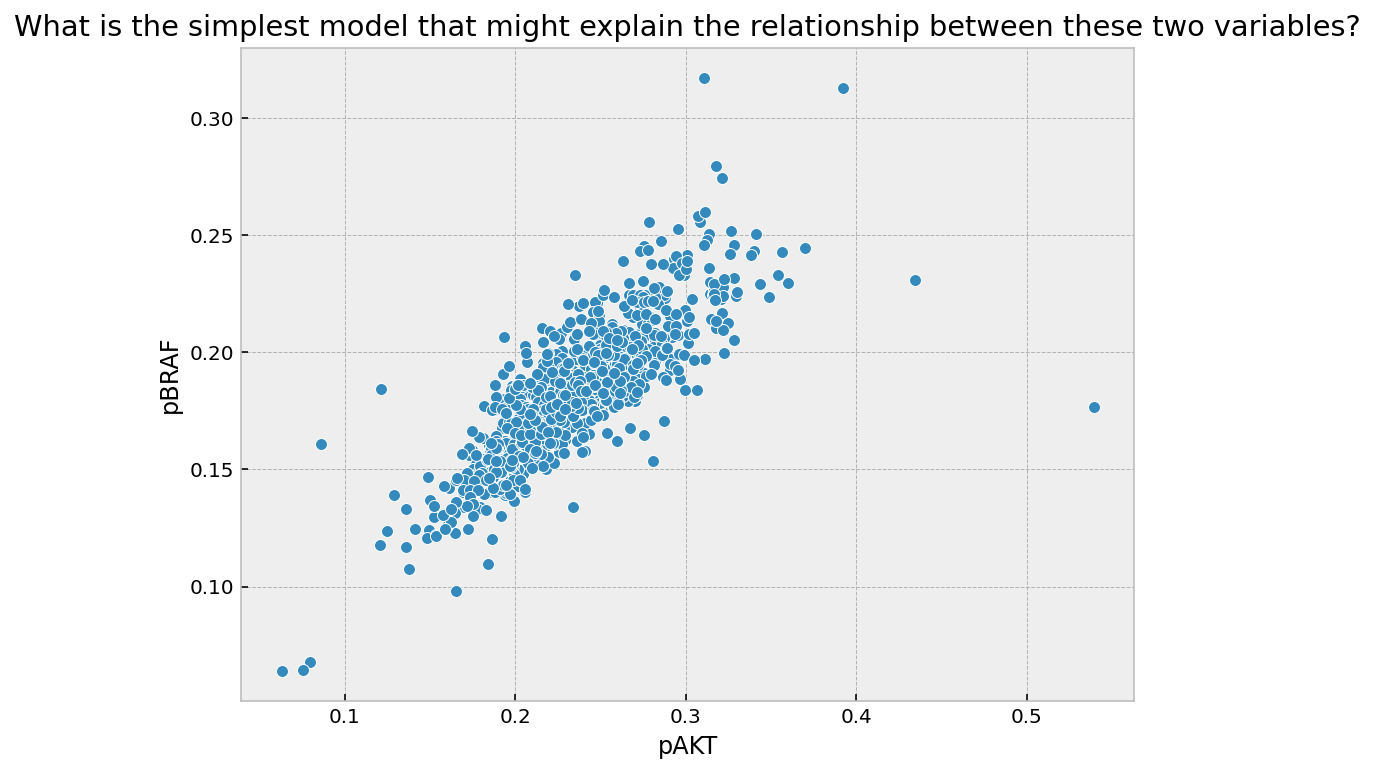

In [3]:
plt.plot(df.pAKT, df.pBRAF, 'o')
plt.xlabel('pAKT')
plt.ylabel('pBRAF')
plt.title('What is the simplest model that might explain the relationship between these two variables?');

How about a line?

$y = b + m \ x$

$pBRAF = intercept + slope * pAKT$

What's so great about a line?

* Simple
* Easy to interpret
    * $1$ unit change in pAKT $\rightarrow slope$ units change in pBRAF

### scikit-learn

`conda install scikit-learn`

In [4]:
from sklearn.linear_model import LinearRegression

Prepare the $(x, y)$ data.

$x$ MUST be a column vector of size $N \times 1$

$y$ is a one-dimensional array of length $N$

In [5]:
# (x, y) data
df2 = df[['pAKT', 'pBRAF']]
df2 = df2.dropna()  # get rid of any rows missing data

X = df2.pAKT.to_numpy()
y = df2.pBRAF.to_numpy()

X.shape, y.shape

((1077,), (1077,))

In [6]:
# X must be a column vector!
X = X.reshape([-1,1])

X.shape

(1077, 1)

In [7]:
# Step 1: Create a model object
model = LinearRegression()

# Step 2: Fit the model to the data
model.fit(X, y)

print(model.intercept_)  # y-intercept (beta0)
print(model.coef_)  # slope (beta1)

0.056882766204537485
[0.53593816]


$\hat{y} = \beta_0 + \beta_1 x$

Predict the pBRAF expression level in four cells that have pAKT expression levels of 0.1, 0.2, 0.3 and 0.4, respectively.

In [8]:
# Step 3: Use the model to predict y for new values of x.
Xnew = np.array([0.1, 0.2, 0.3, 0.4]).reshape(-1,1)  # column vector

yprediction = model.predict(Xnew)

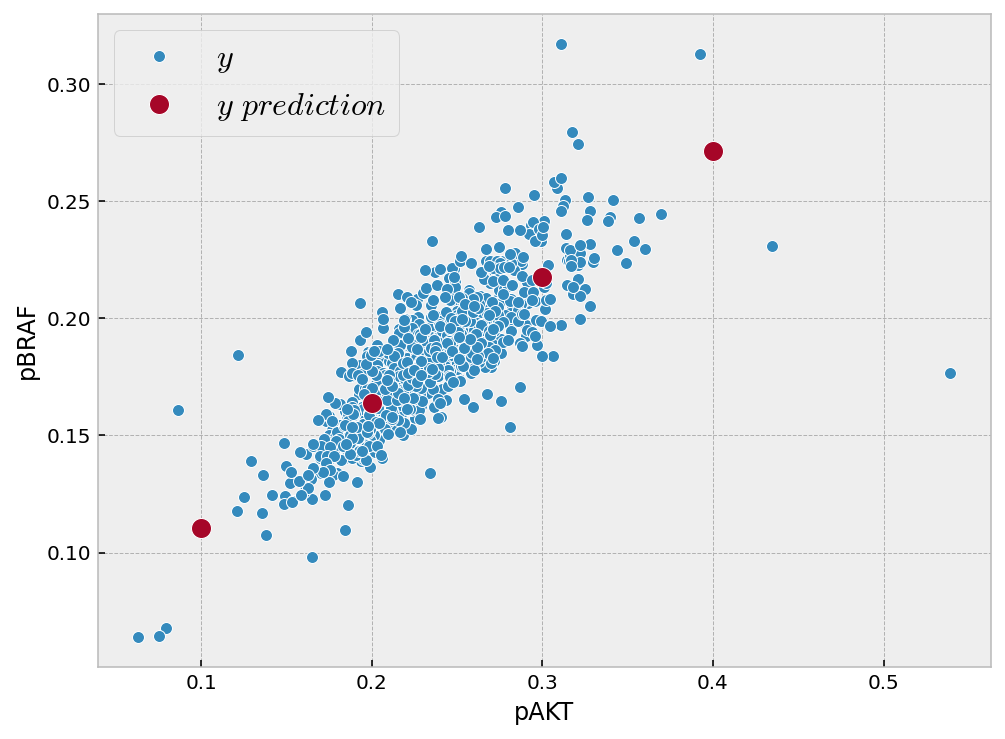

In [11]:
# model prediction
plt.plot(X, y, 'o', label='$y$')
plt.plot(Xnew, yprediction, 'o', ms=10, label='$y\ prediction$')
plt.xlabel('pAKT')
plt.ylabel('pBRAF')
plt.legend(fontsize=16);

Draw a fit line by predicting the pBRAF values for a range of pAKT values that span the dataset.

In [12]:
Xline = np.linspace(X.min(), X.max(), 100).reshape([-1,1])  # column vector
yline = model.predict(Xline)

Xline.shape, yline.shape

((100, 1), (100,))

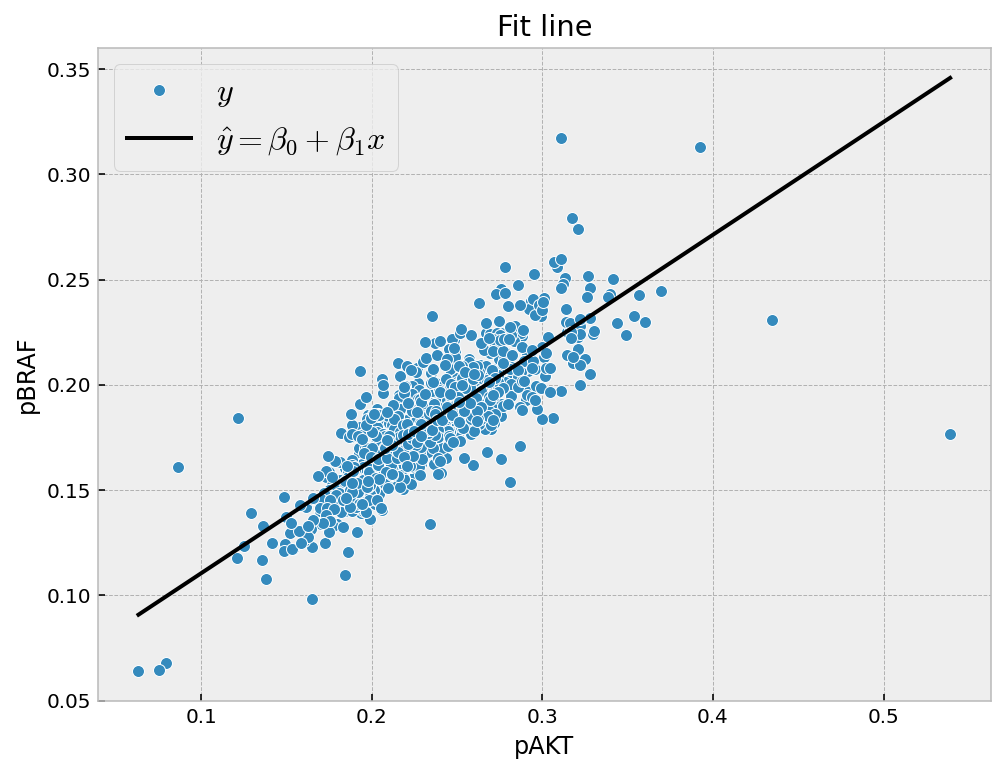

In [13]:
# fit line
plt.plot(X, y, 'o', label='$y$')
plt.plot(Xline, yline, 'k', label=r'$\hat{y} = \beta_0 + \beta_1 x$')
plt.xlabel('pAKT')
plt.ylabel('pBRAF')
plt.title('Fit line')
plt.legend(fontsize=16);

In [14]:
# model prediction for each observed pAKT value
yfit = model.predict(X)

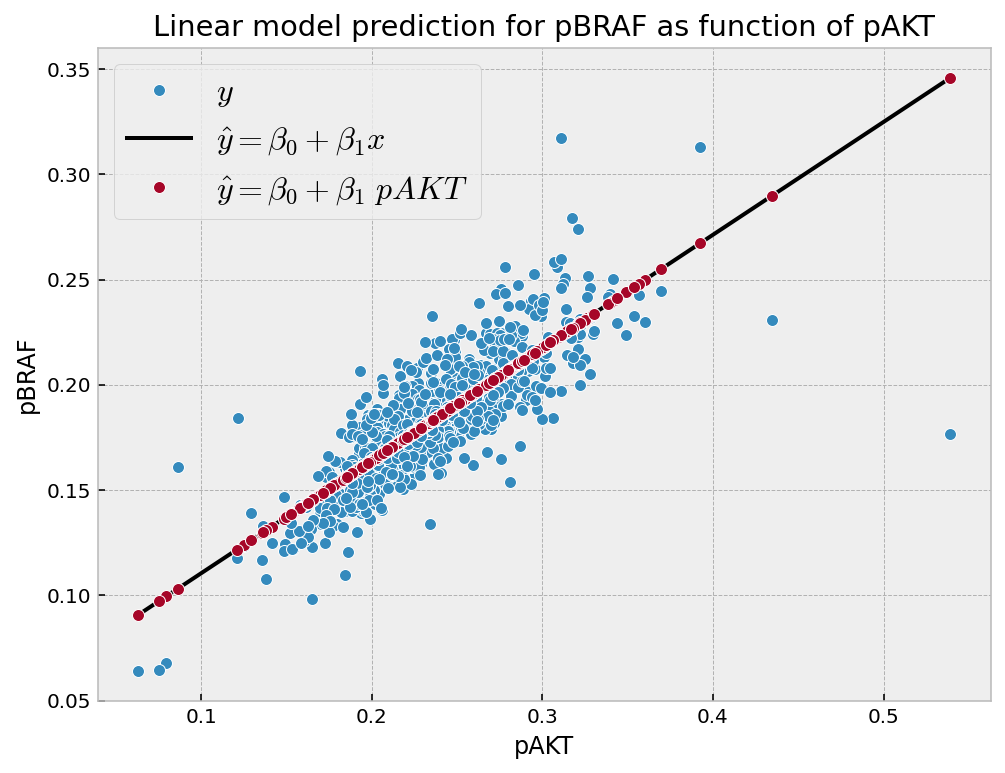

In [15]:
# pAKT predictions
plt.plot(X, y, 'o', label='$y$')
plt.plot(Xline, yline, 'k', label=r'$\hat{y} = \beta_0 + \beta_1 x$')
plt.plot(X, yfit, 'o', label=r'$\hat{y} = \beta_0 + \beta_1 \ pAKT$')
plt.xlabel('pAKT')
plt.ylabel('pBRAF')
plt.title('Linear model prediction for pBRAF as function of pAKT')
plt.legend(fontsize=16);

In [16]:
residuals = y - yfit

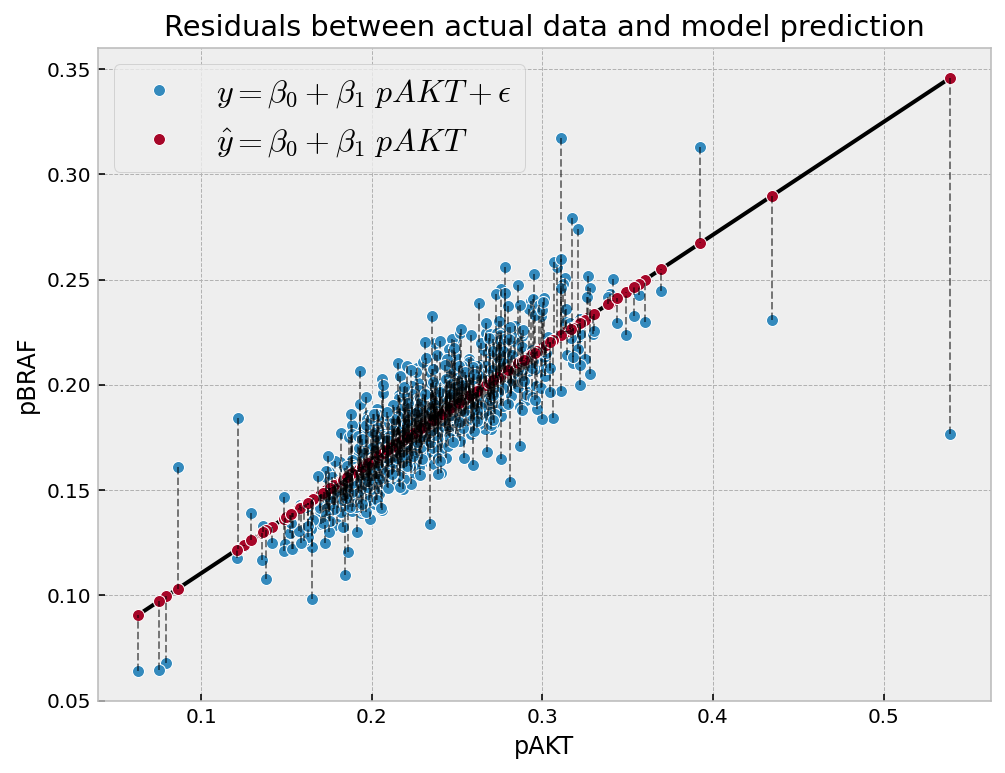

In [17]:
# residuals
plt.plot(X, y, 'o', label=r'$y = \beta_0 + \beta_1 \ pAKT + \epsilon$')
plt.plot(Xline, yline, 'k')
plt.plot(X, yfit, 'o', label=r'$\hat{y} = \beta_0 + \beta_1 \ pAKT$')
plt.plot(np.hstack([X, X]).T, np.hstack([y.reshape([-1,1]), yfit.reshape([-1,1])]).T, 'k--', lw=1, alpha=0.5)
plt.xlabel('pAKT')
plt.ylabel('pBRAF')
plt.title('Residuals between actual data and model prediction')
plt.legend(fontsize=16);

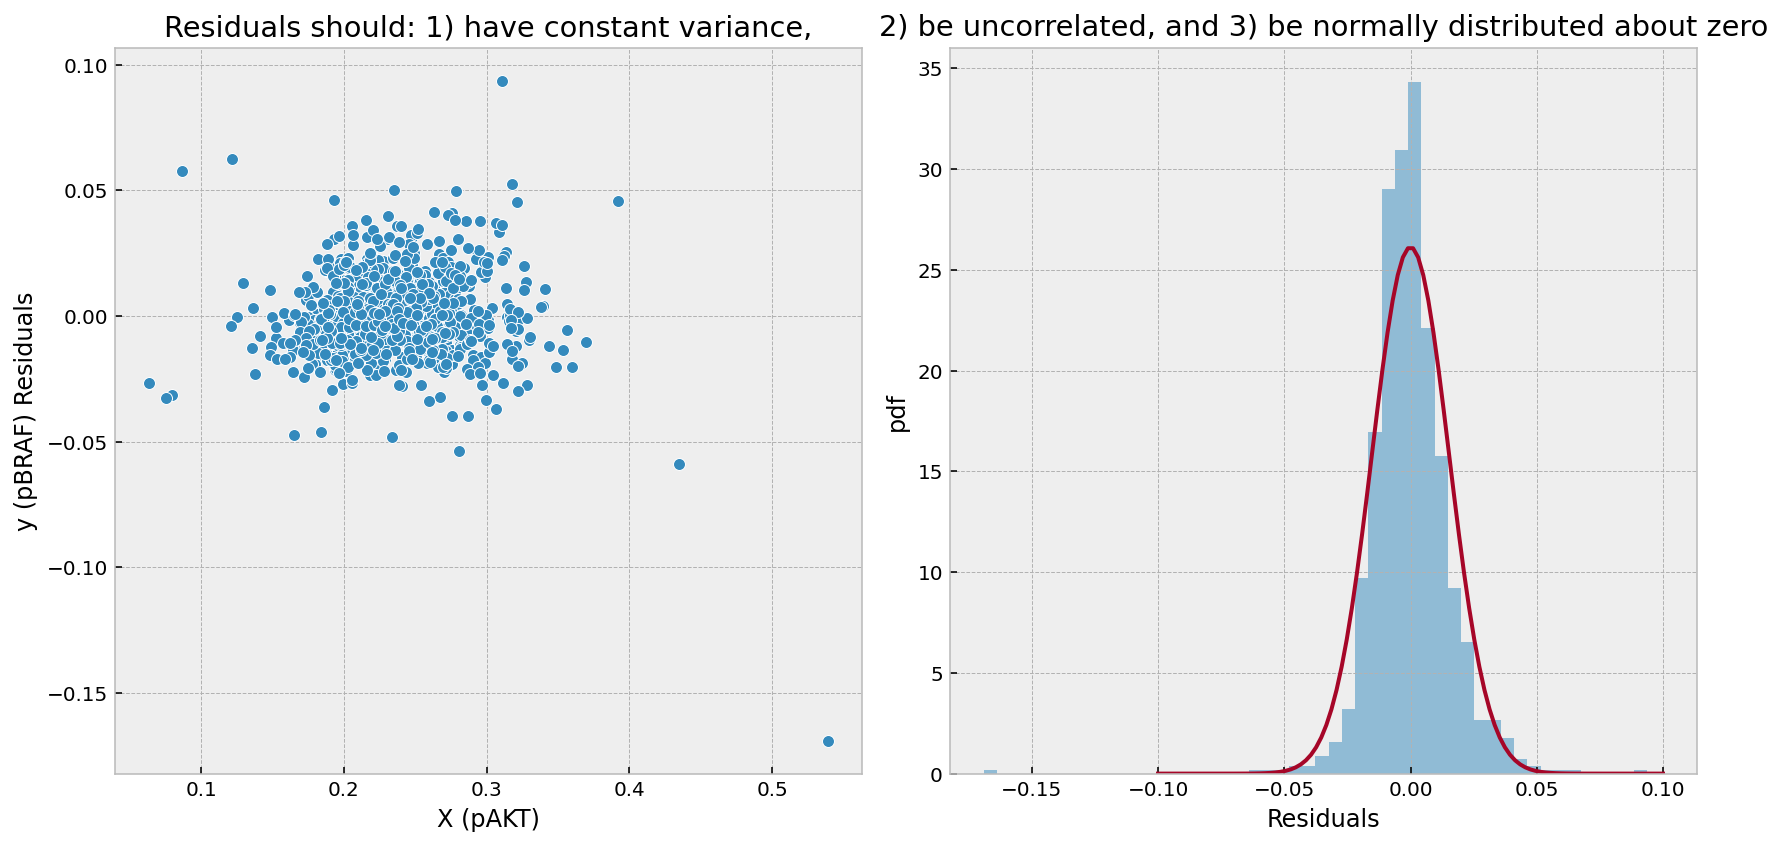

In [18]:
# residuals
plt.figure(figsize=[12,6])
plt.subplot(121)
plt.plot(X, residuals, 'o')
plt.xlabel('X (pAKT)')
plt.ylabel('y (pBRAF) Residuals')
plt.title('Residuals should: 1) have constant variance,')
plt.subplot(122)
plt.hist(residuals, 50, density=True, alpha=0.5)
import scipy.stats as st
rx = np.linspace(-0.1, 0.1, 100)
pdf = st.norm(residuals.mean(), residuals.std()).pdf(rx)
plt.plot(rx, pdf)
plt.xlabel('Residuals')
plt.ylabel('pdf')
plt.title('2) be uncorrelated, and 3) be normally distributed about zero')
plt.tight_layout();

Residuals should be centered around zero. If not, a linear fit may not be appropriate.

![](images/linear_vs_quadratic_residuals.png)

Variance should be constant. If not, can you transform the data to achieve this?

![](images/y_vs_logy_residuals.png)

Outliers can be identified as extreme residuals.

Studentized residuals are the residuals divided by their standard deviation, which can be useful for quantifying extreme residuals (e.g., larger than a few standard deviations).

![](images/outliers.png)

# Exercise

1. Studentize `residuals` by dividing them by their standard deviation.
2. Make a scatter plot of the studentized residuals vs. `X`.
3. Identify outliers with studentized residuals larger than a few standard deviations.

Outliers with high leverage have the most impact on your model. Both data points 20 and 41 are outliers, but 41 has more leverage than 20.

![](images/leverage.png)

### leverage for $i^{th}$ data point: $h_i = \frac{1}{n} + \frac{(X_i - \bar{X})^2}{\sum_{j=1}^n{(X_j - \bar{X})^2}}$

In [19]:
leverage = 1/len(X) + (X - X.mean())**2 / ((X - X.mean())**2).sum()

In [20]:
outlier = np.abs(residuals / residuals.std()) > 3
highleverage = (leverage > 0.01).reshape(-1)

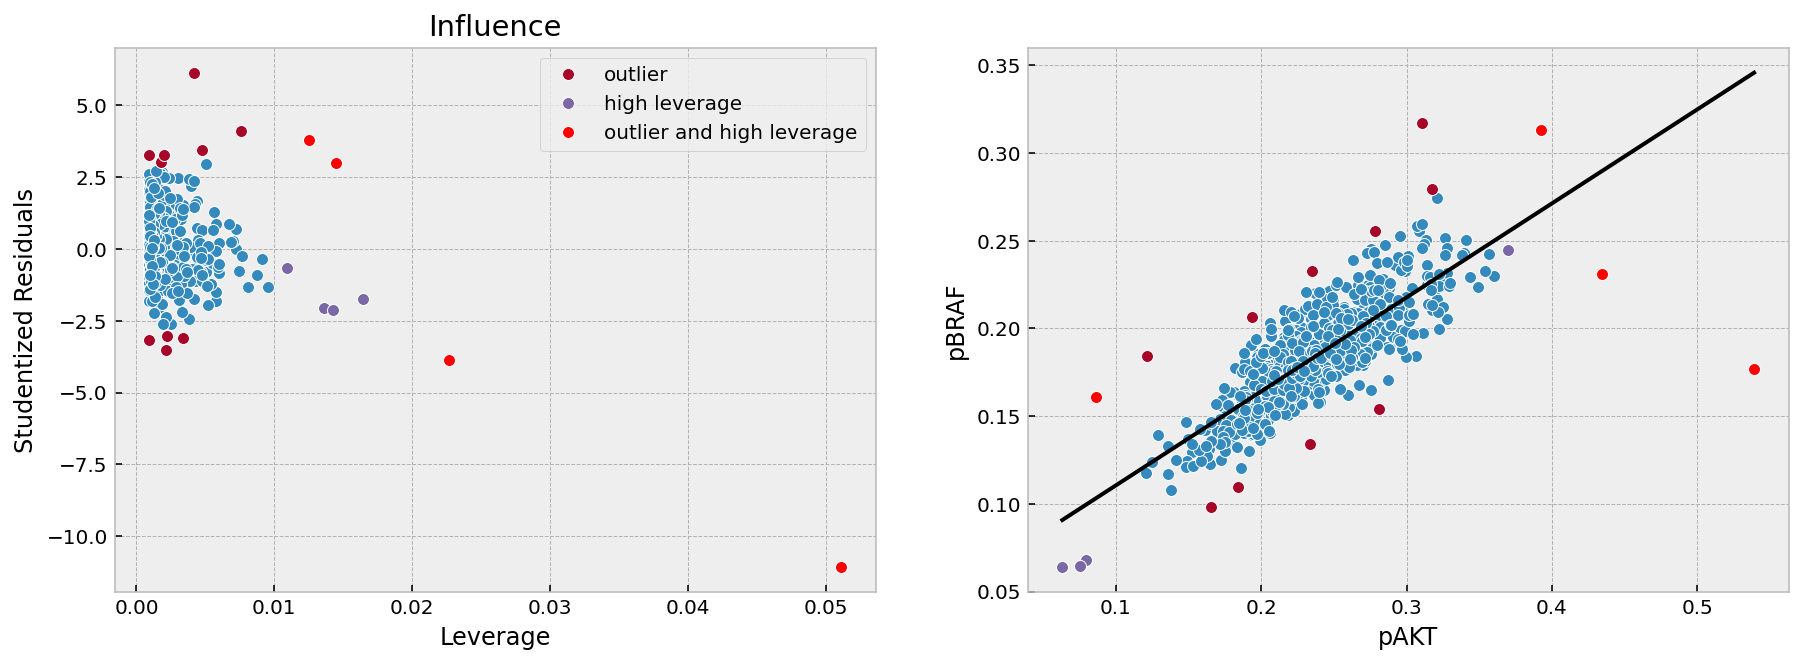

In [21]:
# outliers and leverage
plt.figure(figsize=[15,5])
plt.subplot(121)
plt.plot(leverage, residuals / residuals.std(), 'o')
plt.plot(leverage[outlier], residuals[outlier] / residuals.std(), 'o', label='outlier')
plt.plot(leverage[highleverage], residuals[highleverage] / residuals.std(), 'o', label='high leverage')
plt.plot(leverage[outlier & highleverage], residuals[outlier & highleverage] / residuals.std(), 'ro', label='outlier and high leverage')
plt.xlabel('Leverage')
plt.ylabel('Studentized Residuals')
plt.title('Influence')
plt.legend()
plt.subplot(122)
plt.plot(X, y, 'o')
plt.plot(X[outlier], y[outlier], 'o', label='outlier')
plt.plot(X[highleverage], y[highleverage], 'o', label='high leverage')
plt.plot(X[outlier & highleverage], y[outlier & highleverage], 'ro', label='outlier and high leverage')
plt.plot(Xline, yline, 'k')
plt.xlabel('pAKT')
plt.ylabel('pBRAF');

`statsmodels` package has some nice analytical prebaked plots.

`conda install -c conda-forge statsmodels`

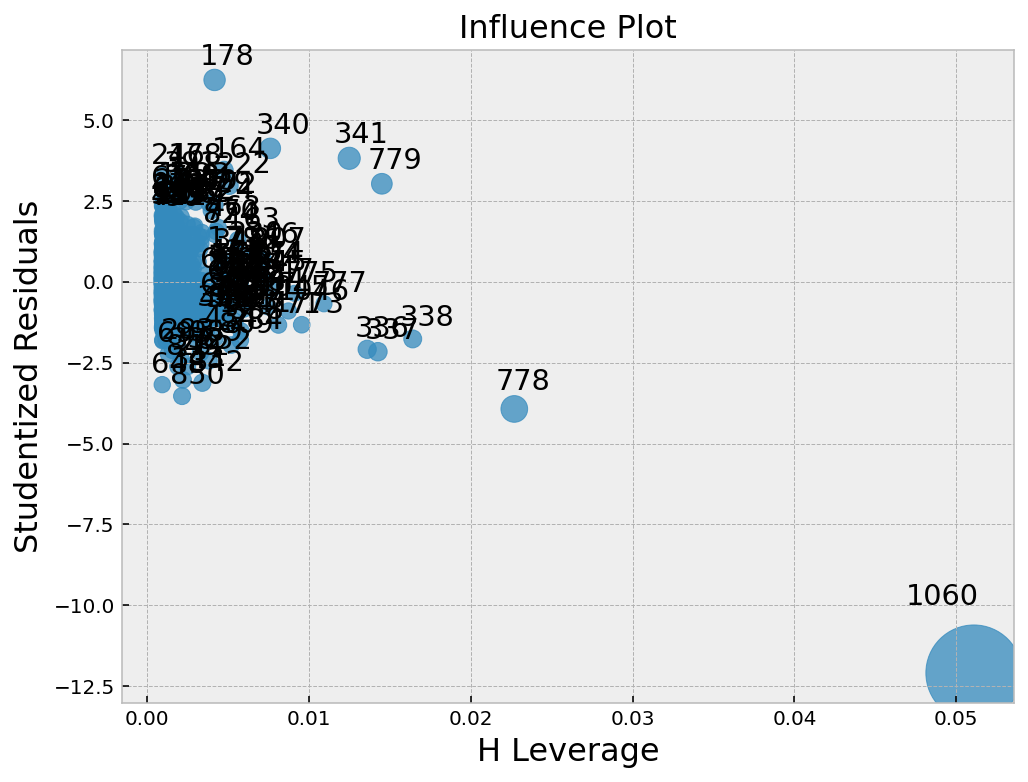

In [25]:
import statsmodels.api as sm

olsmodel = sm.OLS(y, sm.add_constant(X)).fit()
sm.graphics.influence_plot(olsmodel, criterion="cooks");

How confident are you in the model?

i.e., What are your confidence intervals for the model's parameters (intercept, slope).

If we collected a new set of data points that are a bit different from the first set due to random variation, how much would that affect our linear model?

* Large effect ==> we are not very confident in our model parameters (intercept, slope) as it is highly influenced by random variation in the dataset
* Small effect ==> we are more confident in our model parameters (intercept, slope) despite random variation in the dataset 

# Question?

How can we simulate collecting a new dataset without actually doing it?

Bootstrap sample from a collection of $(x,y)$ data points.

Consider a sample dataset: $(x_0,y_0), (x_1,y_1), (x_2,y_2), (x_3,y_3), (x_4,y_4)$

If you randomly choose $x_3, x_4, x_3, x_0, x_1$ as your bootstrapped $x$ values,

then you MUST choose $y_3, y_4, y_3, y_0, y_1$ as your bootstrapped $y$ values.

In [54]:
xy = np.random.randint(0, 9, size=(5,2))
xy

array([[0, 6],
       [6, 3],
       [2, 8],
       [5, 6],
       [1, 6]])

In [55]:
# bootstrap sample data point indices
ind = np.random.choice(np.arange(5), size=5, replace=True)
ind

array([0, 4, 3, 4, 1])

In [56]:
bootstrap_xy = xy[ind,:]
bootstrap_xy

array([[0, 6],
       [1, 6],
       [5, 6],
       [1, 6],
       [6, 3]])

Use bootstrap to simulate plausible pAKT vs. pBRAF datasets.

Fit a linear model to each bootstrapped dataset and use the distribution of slopes and intercepts to get confidience limits on these parameters.

In [68]:
n = 1000
bs_models = []
bs_slopes = np.zeros((n,))
bs_intercepts = np.zeros((n,))
for i in range(n):
    ind = np.random.choice(np.arange(len(y)), size=len(y), replace=True)
    bs_X = X[ind]
    bs_y = y[ind]
    bs_model = LinearRegression()
    bs_model.fit(bs_X, bs_y)
    bs_models.append(bs_model)
    bs_slopes[i] = bs_model.coef_
    bs_intercepts[i] = bs_model.intercept_

slopeCI = np.quantile(bs_slopes, [0.025, 0.975])
interceptCI = np.quantile(bs_intercepts, [0.025, 0.975])

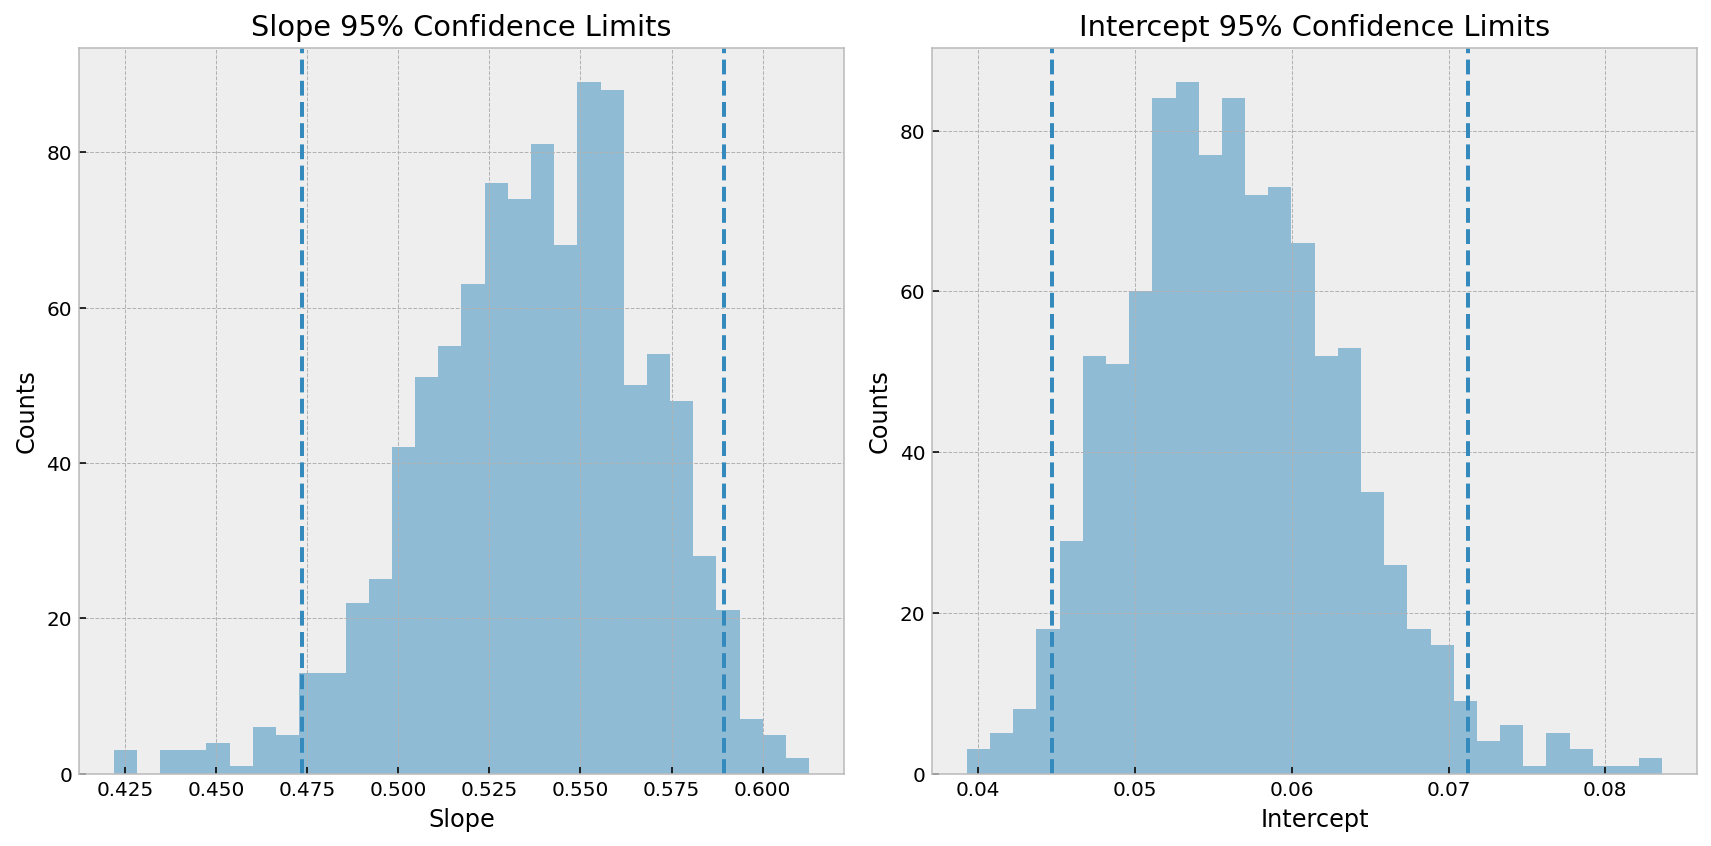

In [70]:
# slope and intercept confidence limits
plt.figure(figsize=[12,6])
plt.subplot(121)
plt.hist(bs_slopes, 30, alpha=0.5)
plt.axvline(slopeCI[0], ls='--')
plt.axvline(slopeCI[1], ls='--')
plt.xlabel('Slope')
plt.ylabel('Counts')
plt.title('Slope 95% Confidence Limits')
plt.subplot(122)
plt.hist(bs_intercepts, 30, alpha=0.5)
plt.axvline(interceptCI[0], ls='--')
plt.axvline(interceptCI[1], ls='--')
plt.xlabel('Intercept')
plt.ylabel('Counts')
plt.title('Intercept 95% Confidence Limits')
plt.tight_layout();

Use the bootstrapped linear models to visualize how random variation in the dataset could affect the fit line.

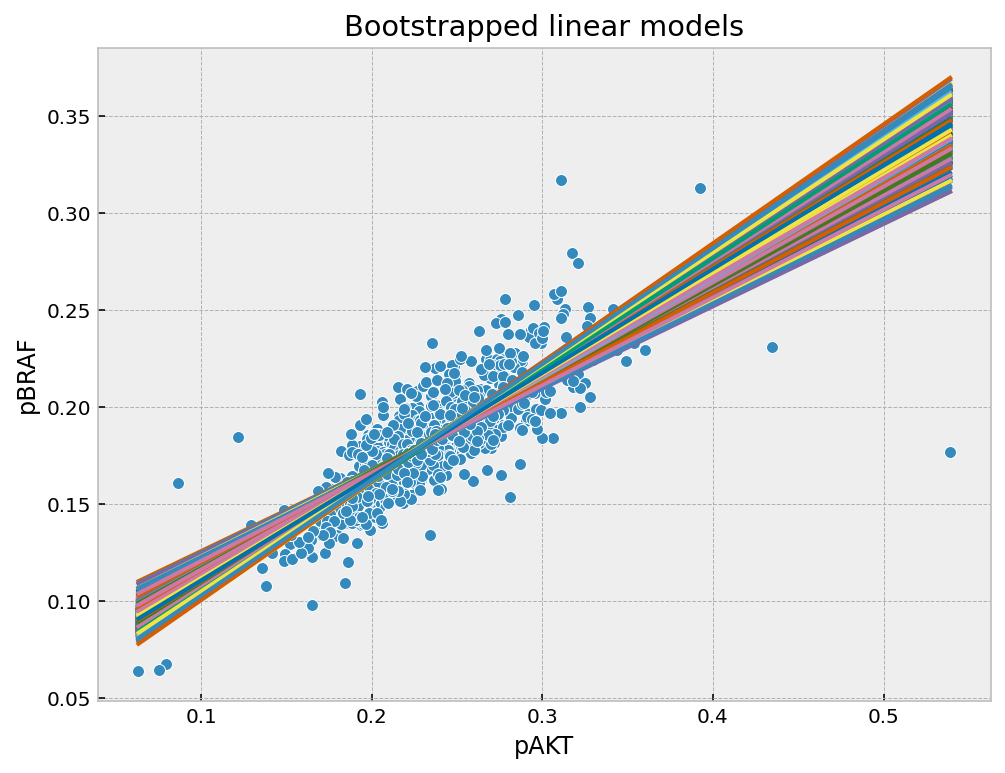

In [71]:
plt.plot(X, y, 'o')
for bs_model in bs_models:
    plt.plot(Xline, bs_model.predict(Xline))
plt.xlabel('pAKT')
plt.ylabel('pBRAF')
plt.title("Bootstrapped linear models");

Get the 95% confidence evelope for the fit line from the bootstrapped fit lines.

In [72]:
# each column of yfits is a bootstrapped fit line (over the x-values in Xline)
n = len(bs_models)
yfits = np.zeros((len(Xline), n))
for i in range(n):
    yfits[:,i] = bs_models[i].predict(Xline)

lb, ub = np.quantile(yfits, [0.025, 0.975], axis=1)

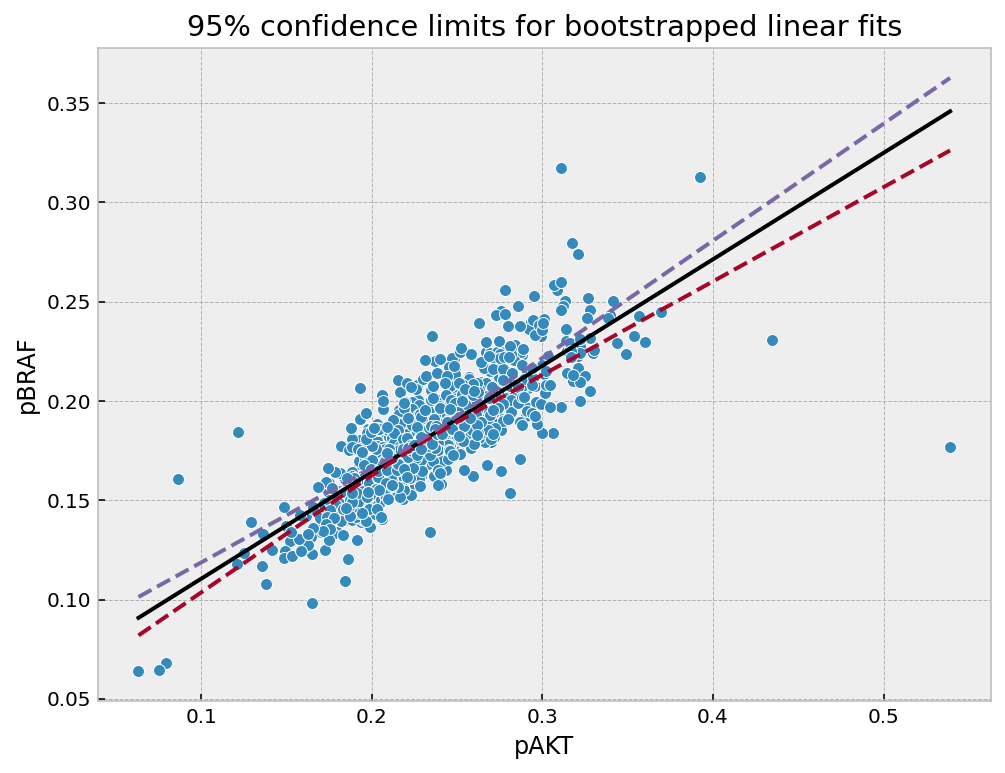

In [73]:
# line ci envelope
plt.plot(X, y, 'o')
plt.plot(Xline, yline, 'k')
plt.plot(Xline, lb, '--')
plt.plot(Xline, ub, '--')
plt.xlabel('pAKT')
plt.ylabel('pBRAF')
plt.title("95% confidence limits for bootstrapped linear fits");

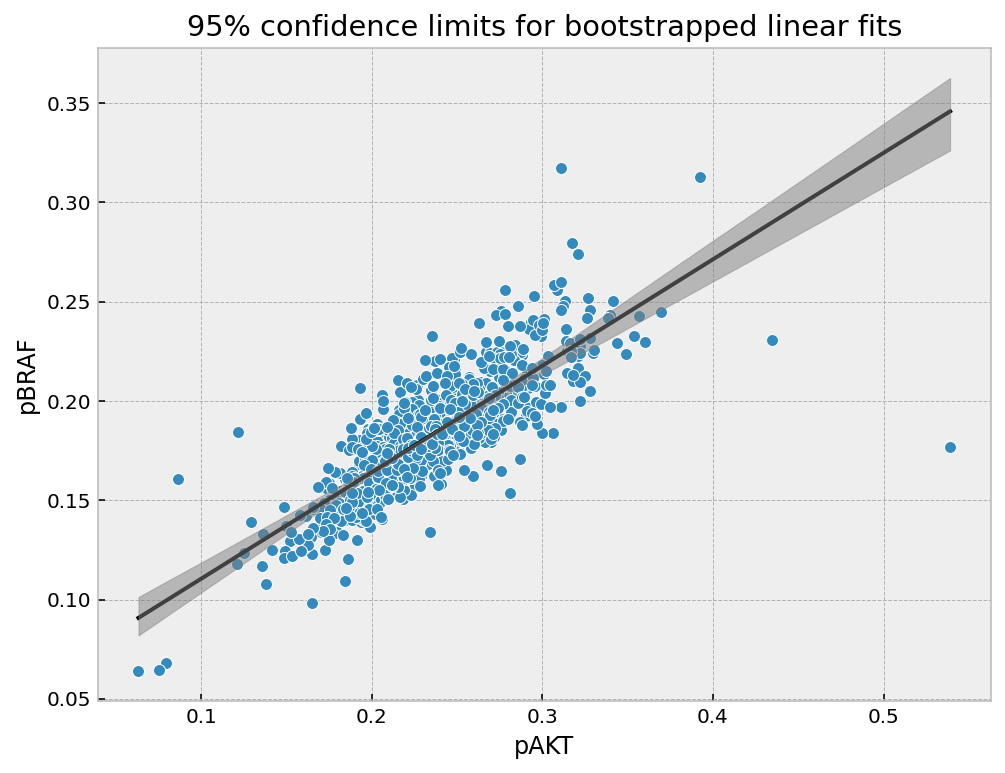

In [74]:
plt.plot(X, y, 'o')
plt.plot(Xline, yline, 'k')
# zorder ensures fill is in front of everything else
plt.fill_between(Xline.reshape((-1)), lb, ub, color='gray', alpha=0.5, zorder=10)  # Xline must be 1-dimensional!
plt.xlabel('pAKT')
plt.ylabel('pBRAF')
plt.title("95% confidence limits for bootstrapped linear fits");

Seaborn `lmplot` provides this visualization out of the box.

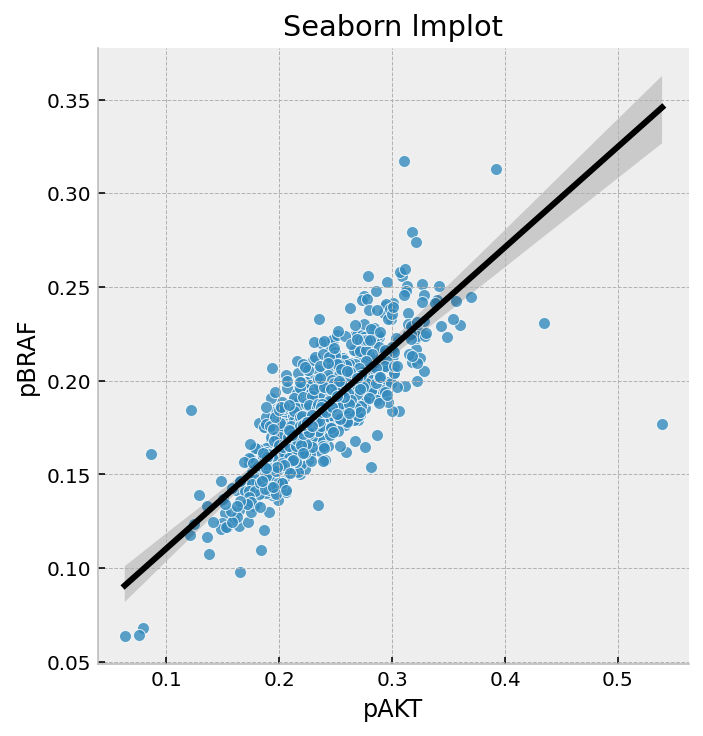

In [75]:
sns.lmplot(data=df, x='pAKT', y='pBRAF', 
           scatter_kws={'edgecolor': 'w', 'linewidths': 0.5}, line_kws={'color': 'k'});
plt.title('Seaborn lmplot');

### Linear Regression

### $y = f(X) = \beta_0 + \beta_1 X$

### Multiple Linear Regression

### $y = f(X_1, X_2, ..., X_N) = \ ?$

### $y = f(X_1, X_2, ..., X_N) = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_N X_N$

Still easy to interpret even for many features even if it is not straightforward to visualize the model with more than two features.

![](images/ols2d.png)

In [76]:
# Meseares of various features and diabetes disease progression for 442 patients.
# Available at https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt
df = pd.read_csv('diabetes.csv')
df

,AGE,SEX,BMI,BP,TC,LDL,HDL,TCH,LTG,GLU,DIS
0,59,2,32.1,101.00,157,93.2,38.0,4.00,4.8598,87,151
1,48,1,21.6,87.00,183,103.2,70.0,3.00,3.8918,69,75
2,72,2,30.5,93.00,156,93.6,41.0,4.00,4.6728,85,141
3,24,1,25.3,84.00,198,131.4,40.0,5.00,4.8903,89,206
4,50,1,23.0,101.00,192,125.4,52.0,4.00,4.2905,80,135
...,...,...,...,...,...,...,...,...,...,...,...
437,60,2,28.2,112.00,185,113.8,42.0,4.00,4.9836,93,178
438,47,2,24.9,75.00,225,166.0,42.0,5.00,4.4427,102,104
439,60,2,24.9,99.67,162,106.6,43.0,3.77,4.1271,95,132
440,36,1,30.0,95.00,201,125.2,42.0,4.79,5.1299,85,220


### $dis = f(age, sex, bmi, bp, tc, ldl, hdl, tch, ltg, glu)$

### $dis = \beta_0 + \beta_1 \ age + \beta_2 \ sex + \beta_3 \ bmi + ... + \beta_{10} \ glu$

The features and target data.

In [77]:
X = df.loc[:,'AGE':'GLU'].to_numpy()
y = df['DIS'].to_numpy()

X.shape, y.shape

((442, 10), (442,))

In [79]:
names = list(df.columns.values)
features = names[:-1]
target = names[-1]

print(features)
print(target)

['AGE', 'SEX', 'BMI', 'BP', 'TC', 'LDL', 'HDL', 'TCH', 'LTG', 'GLU']
DIS


Create the model and fit it to the data.

In [78]:
model = LinearRegression()
model.fit(X, y)

print(model.intercept_)  # y-intercept
print(model.coef_)  # slopes

-334.5671385187876
[-3.63612242e-02 -2.28596481e+01  5.60296209e+00  1.11680799e+00
 -1.08999633e+00  7.46450456e-01  3.72004715e-01  6.53383194e+00
  6.84831250e+01  2.80116989e-01]


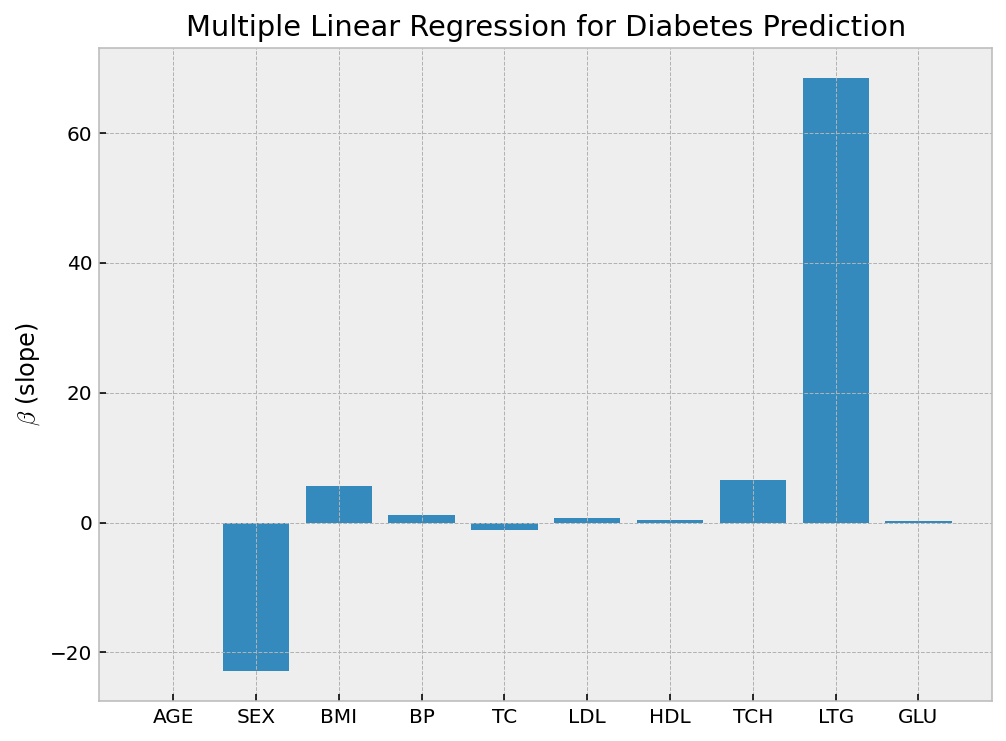

In [80]:
plt.bar(range(len(model.coef_)), model.coef_)
plt.xticks(range(len(model.coef_)), features)
plt.ylabel(r'$\beta$ (slope)')
plt.title('Multiple Linear Regression for Diabetes Prediction');

Which feature do you think is the most influential for predicting diabetes?

But the features have different unrelated units and scales!

In [81]:
df.head()

,AGE,SEX,BMI,BP,TC,LDL,HDL,TCH,LTG,GLU,DIS
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


Standardize data features

1. Subtract the mean of each feature so that it is centered on zero.
2. Normalize the variance of each feature by dividing by the features standard deviation.

In [82]:
Xs = (X - X.mean(axis=0)) / X.std(axis=0)

In [83]:
Xs.var(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

Fit a model using the standardized features.

In [84]:
smodel = LinearRegression()
smodel.fit(Xs, y)

print(smodel.intercept_)  # y-intercept
print(smodel.coef_)  # slopes

152.1334841628959
[ -0.47612079 -11.40686692  24.72654886  15.42940413 -37.67995261
  22.67616277   4.80613814   8.42203936  35.73444577   3.21667372]


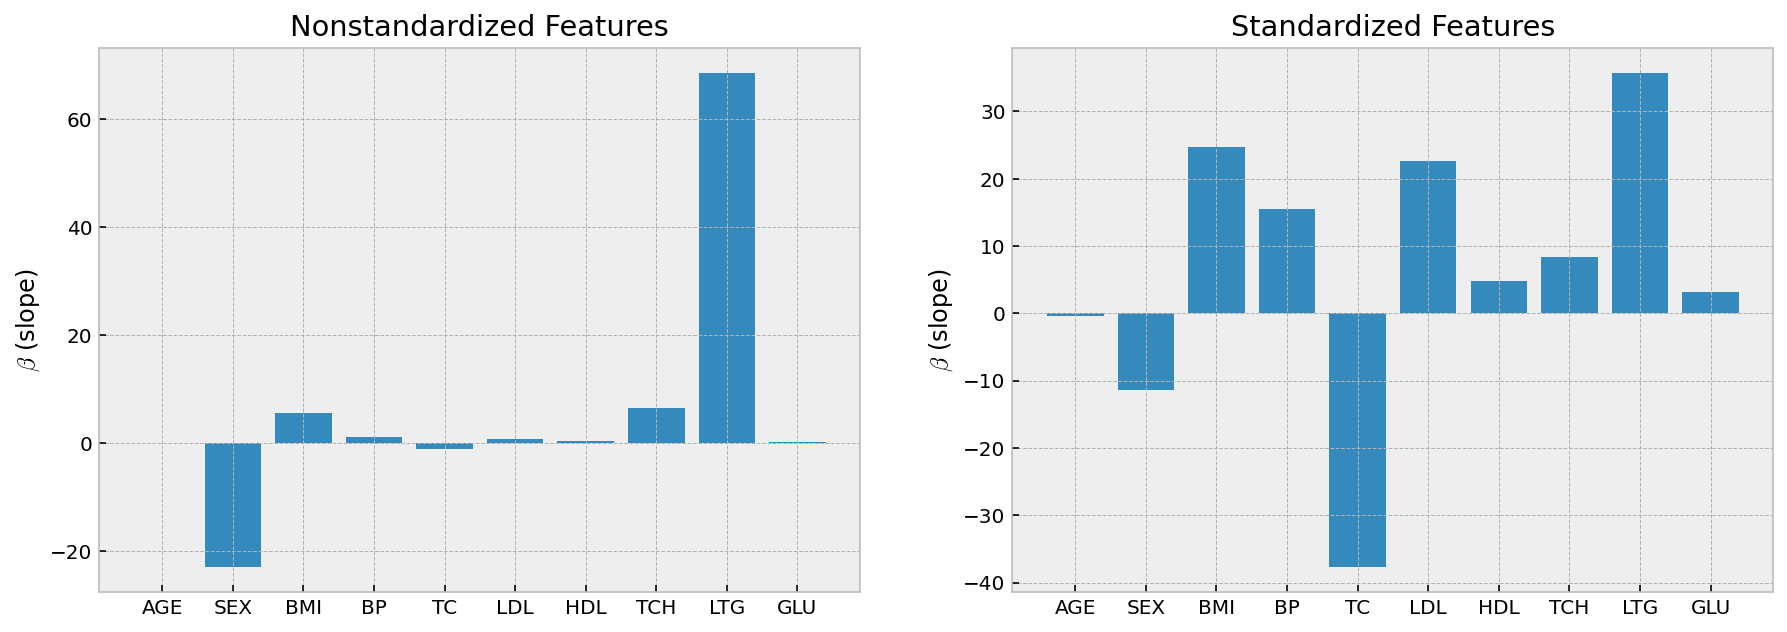

In [85]:
# non-standardized vs. standardized features
plt.figure(figsize=[15,5])
plt.subplot(121)
plt.bar(range(len(model.coef_)), model.coef_)
plt.xticks(range(len(model.coef_)), features)
plt.ylabel(r'$\beta$ (slope)')
plt.title('Nonstandardized Features')
plt.subplot(122)
plt.bar(range(len(smodel.coef_)), smodel.coef_)
plt.xticks(range(len(smodel.coef_)), features)
plt.ylabel(r'$\beta$ (slope)')
plt.title('Standardized Features');

Use your model to predict diabetese progression in a new patient.

In [86]:
age = 50
sex = 1
bmi = 20
map_ = 125
tc = 150
ldl = 100
hdl = 55
tch = 6.5
ltg = 4
glu = 120

new_patient = np.array([age, sex, bmi, map_, tc, ldl, hdl, tch, ltg, glu]).reshape((1,-1))  # row array
new_patient

array([[ 50. ,   1. ,  20. , 125. , 150. , 100. ,  55. ,   6.5,   4. ,
        120. ]])

In [87]:
# new patient diabetes progression prediction from non-standardized model
model.predict(new_patient)

array([174.03769412])

In [88]:
# new patient diabetes progression prediction from model with standardized features
smodel.predict(new_patient)

array([3.76993915])

Why do these two models have such disparate predictions?

# Exercise

Correctly predict the diabetes progression for the new patient using the model with standardized features `smodel`.

In [ ]:
standardized_new_patient = ...
smodel.predict(standardized_new_patient)

Standardizing the target variable $y$ is typically unessecary, but can in some cases help numerical optimization algorithms (especialy in cases where target values are extreme). However, the results must be inverse transformed to be interperable in the original units.

In [89]:
ys = (y - y.mean()) / y.std()

ssmodel = LinearRegression(fit_intercept=False)
ssmodel.fit(Xs, ys);

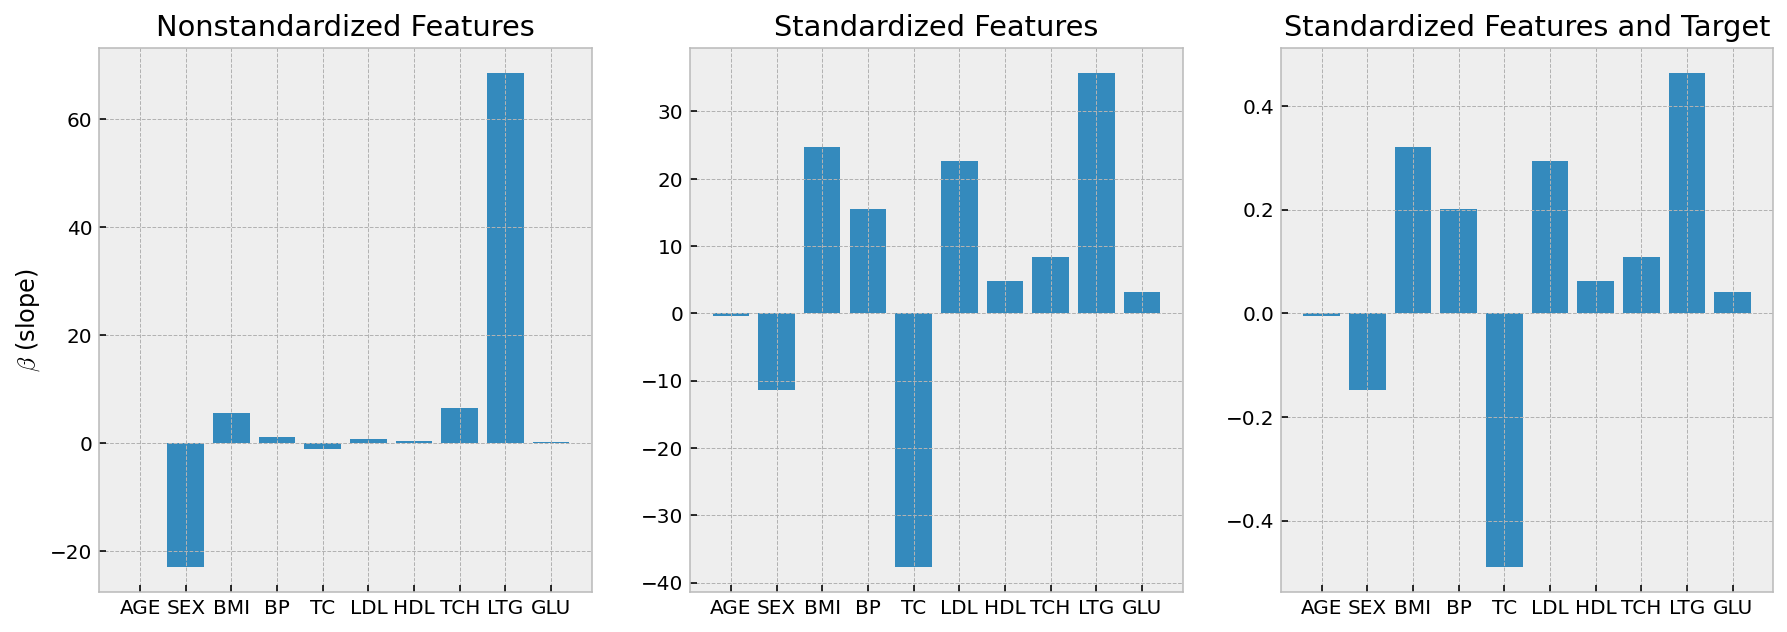

In [90]:
# standardized features vs. features and target
plt.figure(figsize=[15,5])
plt.subplot(131)
plt.bar(range(len(model.coef_)), model.coef_)
plt.xticks(range(len(model.coef_)), features)
plt.ylabel(r'$\beta$ (slope)')
plt.title('Nonstandardized Features')
plt.subplot(132)
plt.bar(range(len(smodel.coef_)), smodel.coef_)
plt.xticks(range(len(smodel.coef_)), features)
plt.title('Standardized Features')
plt.subplot(133)
plt.bar(range(len(ssmodel.coef_)), ssmodel.coef_)
plt.xticks(range(len(ssmodel.coef_)), features)
plt.title('Standardized Features and Target');

# Exercise

1. For one of the above models, create a scatter plot of the measured vs. predicted diabetes progression in all 442 patients. Does it matter which model you choose?
2. Compute the residuals between the measured vs. predicted diabetes progression.

In [ ]:
yprediction = ...
plt.plot(y, yprediction, 'o')
plt.xlabel('Measured Diabetes Progression')
plt.xlabel('Predicted Diabetes Progression')
plt.title('Multiple Linear Regression Model');

In [92]:
residuals = ...

### Mean Squared Error (MSE)

$MSE = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2$

In [94]:
mse = (residuals**2).mean()

mse

2859.6963475867506

### $R^2 = \frac{\text{variance explained by model}}{\text{total variance}} = 1 - \frac{\sum_{i=1}^n (y_i - \hat{y}_i)^2}{\sum_{i=1}^n (y_i - \bar{y})^2}$

![](images/R2.png)

*left*: $R^2 = 0.15$, *right*: $R^2 = 0.85$

In [95]:
R2 = 1 - (residuals**2).sum() / ((y - y.mean())**2).sum()

R2

0.5177484222203498

In [99]:
model.score(X, y)

0.5177484222203498

# Question?

How could you get confidence intervals for the slope parameter of each feature in the model?

`statsmodels` is another package that returns confidence intervals for linear regression parameters.

However, it's important that you understand how to obtain these yourself in a manner that is generally applicaple to any sort of model.

# Exercise

1. Generate a linear model for predicting diabetes progression based on the two standardized features that have the largest impact.
2. Compute the $R^2$ score for the model's fit and compare to the model with all 10 features. Which is better?
3. Use the model to predict the diabetes progression in the new patient from above.
4. Make a bar plot of the model's slope parameters for the selected features.

In [ ]:
# prepare the data
features = [...]
X = ...  # 2 features
Xs = ...  # standardized
y = ...  # target

# create the linear model
model = ...

# fit the model to the data
...

# R^2 score (compare to model with all 10 features having R^2 ~ -.518)
R2 = ...

# predict diabetes progression in a new patient
Xnew = ...
ynew_prediction = ...

# plot the model's slope parameters for each feature
plt.bar(...)
plt.xticks(range(len(model.coef_)), features)
plt.ylabel('Slope');